In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
len(cities)

609

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

from citipy import citipy

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | okmulgee
Processing Record 8 of Set 1 | russell
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | myitkyina
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | boende
Processing Record 13 of Set 1 | popondetta
Processing Record 14 of Set 1 | fort nelson
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | hambantota
Processing Record 18 of Set 1 | sinazongwe
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | chalus
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | provideniya
Processing Record 24

Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | ericeira
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | burnie
Processing Record 44 of Set 4 | oksfjord
Processing Record 45 of Set 4 | narrabri
Processing Record 46 of Set 4 | negele
City not found. Skipping...
Processing Record 47 of Set 4 | carutapera
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | somerset
Processing Record 50 of Set 4 | vao
Processing Record 1 of Set 5 | beloha
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | valleyview
Processing Record 6 of Set 5 | araci
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | aracaju
Processing Record 9 of Set 5 | mattru
Processing Record 10 of Set 5 | peniche
Processing Record 11 of Set 5 | kozhva
Processing Re

Processing Record 28 of Set 8 | lagos
Processing Record 29 of Set 8 | port macquarie
Processing Record 30 of Set 8 | benito juarez
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | eldikan
City not found. Skipping...
Processing Record 33 of Set 8 | pachino
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | dharchula
Processing Record 36 of Set 8 | luanda
Processing Record 37 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 8 | mglin
Processing Record 39 of Set 8 | karpathos
Processing Record 40 of Set 8 | aguas belas
Processing Record 41 of Set 8 | constitucion
Processing Record 42 of Set 8 | verkhoyansk
Processing Record 43 of Set 8 | storsteinnes
Processing Record 44 of Set 8 | flagstaff
Processing Record 45 of Set 8 | umm lajj
Processing Record 46 of Set 8 | huangmei
Processing Record 47 of Set 8 | maningrida
Processing Record 48 of Set 8 | mombetsu
Processing Record 49 of Set 8 | hofn
Processing Record 50 of Set 8 

Processing Record 19 of Set 12 | la ronge
Processing Record 20 of Set 12 | matamoros
Processing Record 21 of Set 12 | pio ix
Processing Record 22 of Set 12 | mendahara
City not found. Skipping...
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | kristiansund
Processing Record 25 of Set 12 | herat
Processing Record 26 of Set 12 | kasongo-lunda
Processing Record 27 of Set 12 | phuket
Processing Record 28 of Set 12 | kalmunai
Processing Record 29 of Set 12 | chagda
City not found. Skipping...
Processing Record 30 of Set 12 | xacmaz
Processing Record 31 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 32 of Set 12 | sao filipe
Processing Record 33 of Set 12 | cahokia
Processing Record 34 of Set 12 | marcona
City not found. Skipping...
Processing Record 35 of Set 12 | ventersburg
Processing Record 36 of Set 12 | chake chake
Processing Record 37 of Set 12 | bossangoa
Processing Record 38 of Set 12 | arkhipovka
Proc

In [9]:
len(city_data)

563

In [10]:
#array of dictionaries to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,65.77,57,92,6.98,AU,2022-11-03 02:57:07
1,Albany,42.6001,-73.9662,49.73,66,34,2.06,US,2022-11-03 02:57:07
2,Butaritari,3.0707,172.7902,81.48,66,79,14.63,KI,2022-11-03 02:57:08
3,Khatanga,71.9667,102.5000,15.57,93,100,18.66,RU,2022-11-03 02:57:08
4,Cidreira,-30.1811,-50.2056,55.24,70,0,1.52,BR,2022-11-03 02:57:08
5,Punta Arenas,-53.1500,-70.9167,50.11,57,0,28.77,CL,2022-11-03 02:57:08
6,Okmulgee,35.6234,-95.9605,62.38,82,45,11.12,US,2022-11-03 02:54:28
7,Russell,32.3502,-85.1999,62.01,74,0,4.50,US,2022-11-03 02:57:09
8,Hobart,-42.8794,147.3294,63.05,57,75,23.02,AU,2022-11-03 02:52:42
9,Myitkyina,25.3833,97.4000,75.63,49,0,0.56,MM,2022-11-03 02:57:09


In [11]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2022-11-03 02:57:07,-33.8667,121.9000,65.77,57,92,6.98
1,Albany,US,2022-11-03 02:57:07,42.6001,-73.9662,49.73,66,34,2.06
2,Butaritari,KI,2022-11-03 02:57:08,3.0707,172.7902,81.48,66,79,14.63
3,Khatanga,RU,2022-11-03 02:57:08,71.9667,102.5000,15.57,93,100,18.66
4,Cidreira,BR,2022-11-03 02:57:08,-30.1811,-50.2056,55.24,70,0,1.52
5,Punta Arenas,CL,2022-11-03 02:57:08,-53.1500,-70.9167,50.11,57,0,28.77
6,Okmulgee,US,2022-11-03 02:54:28,35.6234,-95.9605,62.38,82,45,11.12
7,Russell,US,2022-11-03 02:57:09,32.3502,-85.1999,62.01,74,0,4.50
8,Hobart,AU,2022-11-03 02:52:42,-42.8794,147.3294,63.05,57,75,23.02
9,Myitkyina,MM,2022-11-03 02:57:09,25.3833,97.4000,75.63,49,0,0.56


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

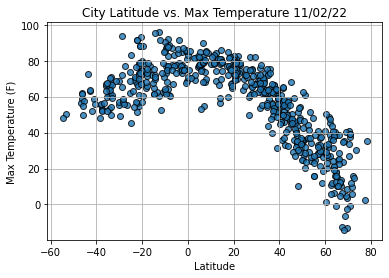

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()